In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# same thing as the other file but using seaborn instead of matplotlib

top_richest = pd.read_csv('top_100_richest.csv', index_col='rank')
country_stats = pd.read_csv('wiki_number_of_billionaires.csv')
gdps = pd.read_csv('gdp_csv.csv')
ages = top_richest[['name', 'age']]

In [3]:
# taking a look at the datasets that one is working with

top_richest.head()

,name,net_worth,bday,age,nationality
rank,,,,,
1,Elon Musk,$240 Billion,28-Jun-71,51.0,South Africa
2,Jeff Bezos,$150 Billion,12-Jan-64,58.0,United States of America
3,Gautam Adani,$138 Billion,24-Jun-62,60.0,India
4,Bernard Arnault,$135 Billion,5-Mar-49,73.0,France
5,Bill Gates,$118 Billion,28-Oct-55,66.0,United States of America


In [4]:
country_stats.head()

,country,num_billionares,billionaire_per_million
0,World,"2,668",0.350
1,United States,735,1.853
2,Mainland China,539,0.276
3,India,166,0.101
4,Germany,134,1.553


In [5]:
gdps.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


<AxesSubplot:xlabel='name', ylabel='age'>

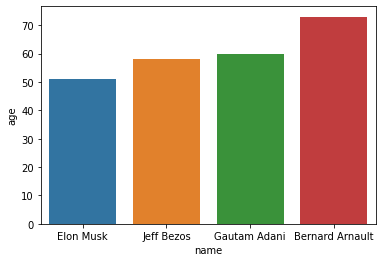

In [6]:
# bar graph of the top 5 wealthies from the dataset comparing their ages

sns.barplot(data=ages.iloc[:4], x='name', y='age')

<AxesSubplot:xlabel='name', ylabel='age'>

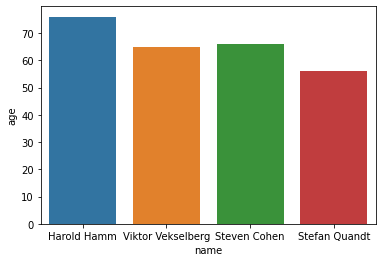

In [7]:
# bar graph of the 4 lowest on the list comparing their ages

sns.barplot(data=ages.iloc[-4:], x='name', y='age')

In [8]:
# as one can see, the type of variable the 'num_billionares' is stored as is a string.
# we will change this so that we can make more meaningful comparisons with the data

type(country_stats['num_billionares'].iloc[0])

str

In [9]:
# converted all of the values in the 'num_billionares column into integers and updated
# the original dataframe

num_bill_old = country_stats['num_billionares']
num_bill_new = np.array([x.replace(',', '') for x in num_bill_old])
num_bill_new = num_bill_new.astype(int)
country_stats['num_billionares'] = num_bill_new
type(country_stats['num_billionares'].iloc[0]), country_stats['num_billionares'].iloc[0]

(numpy.int32, 2668)

<AxesSubplot:xlabel='country', ylabel='num_billionares'>

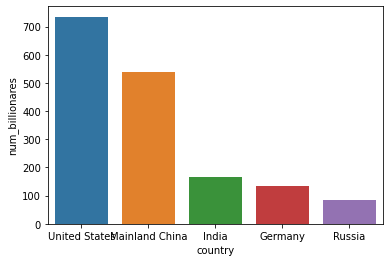

In [10]:
# number of billionaires in top countries

sns.barplot(data=country_stats.iloc[1:6:], x='country', y='num_billionares')

<AxesSubplot:xlabel='country', ylabel='billionaire_per_million'>

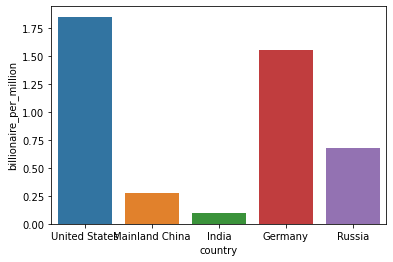

In [11]:
sns.barplot(data=country_stats.iloc[1:6], x='country', y='billionaire_per_million')

In [12]:
# finding the range of ages, by turning it into a list and finding the minimum and maximum ages

age_counts = ages.value_counts('age').to_dict()
l = ages['age'].tolist()
min(l), max(l)

(36.0, 97.0)

In [13]:
# creating a function that will create groupings of age ranges

def make_range(beg_num, num_ranges):
    bg = beg_num
    nr = num_ranges
    groupings = []
    for x in range(nr):
        grp = range(bg, bg+9)
        bg += 10
        groupings.append(list(grp))
    return groupings

In [14]:
richest_age_ranges = make_range(30, 7)

In [15]:
# creating a function that will record the number of instances of each age range from the dataset

def age_groups_counts(df, col_name, age_ranges):
    df_col = df[col_name].tolist()
    age_group_counts = []
    for x in age_ranges:
        lowest = min(x)
        highest = max(x)
        r = range(lowest, highest)
        age_group = 0
        for y in df_col:
            if y in r:
                age_group += 1
                df_col.remove(y)
                next
            else:
                next
        age_group_counts.append(age_group)
        next
    return age_group_counts

In [16]:
# utilizing functions created above to make a bar graph illustrating the age ranges of the dataset

richest_age_group_counts = age_groups_counts(top_richest, 'age', richest_age_ranges)

graph_groupings_names = {'30s':0, '40s':0, '50s':0, '60s':0, '70s':0, '80s':0, '90s':0}
for i, x in enumerate(graph_groupings_names):
    graph_groupings_names[x] = richest_age_group_counts[i]
    
graph_groupings_names

{'30s': 2, '40s': 2, '50s': 14, '60s': 16, '70s': 16, '80s': 9, '90s': 6}

In [17]:
grp_ages = pd.DataFrame(graph_groupings_names.values(), graph_groupings_names.keys())
grp_ages = grp_ages.reset_index()
grp_ages.columns = ['age_range', 'count']
grp_ages

,age_range,count
0,30s,2
1,40s,2
2,50s,14
3,60s,16
4,70s,16
5,80s,9
6,90s,6


<AxesSubplot:xlabel='age_range', ylabel='count'>

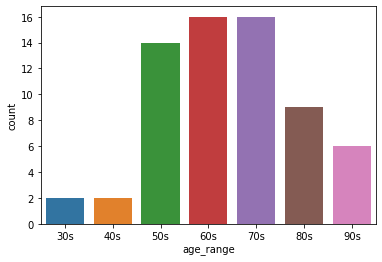

In [18]:
# a bar graph showing the most common ages of the top 100 wealthiest individuals

sns.barplot(data=grp_ages, x=grp_ages['age_range'], y=grp_ages['count'])

In [21]:
# taking first steps to be able to compare the different datasets by obtaining only the necessary dates from
# the "gdp_csv" dataframe

year_index_gdps = gdps.set_index('Year')
most_recent_gdps = year_index_gdps.loc[2016]
most_recent_gdps = most_recent_gdps.reset_index()
most_recent_gdps.head()

,Year,Country Name,Country Code,Value
0,2016,Arab World,ARB,2.504703e+12
1,2016,Caribbean small states,CSS,6.670736e+10
2,2016,Central Europe and the Baltics,CEB,1.312158e+12
3,2016,Early-demographic dividend,EAR,1.040199e+13
4,2016,East Asia & Pacific,EAS,2.248043e+13


In [24]:
most_recent_gdps = most_recent_gdps.rename(columns={'Country Name':'country'})
most_recent_gdps.head()

,Year,country,Country Code,Value
0,2016,Arab World,ARB,2.504703e+12
1,2016,Caribbean small states,CSS,6.670736e+10
2,2016,Central Europe and the Baltics,CEB,1.312158e+12
3,2016,Early-demographic dividend,EAR,1.040199e+13
4,2016,East Asia & Pacific,EAS,2.248043e+13


In [30]:
gdps_bill = most_recent_gdps.merge(country_stats, on='country').rename(columns={'num_billionares':'num_billionaires'})
gdps_bill_bybpm = gdps_bill.sort_values(by='billionaire_per_million', ascending=False)
gdps_bill_bygdp = gdps_bill.sort_values(by='Value', ascending=False)
gdps_bill_bygdp.head()

,Year,country,Country Code,Value,num_billionaires,billionaire_per_million
0,2016,World,WLD,7.584511e+13,2668,0.350
59,2016,United States,USA,1.862448e+13,735,1.853
29,2016,Japan,JPN,4.940159e+12,40,0.207
20,2016,Germany,DEU,3.477796e+12,134,1.553
58,2016,United Kingdom,GBR,2.647899e+12,49,0.674


<AxesSubplot:xlabel='Value', ylabel='num_billionaires'>

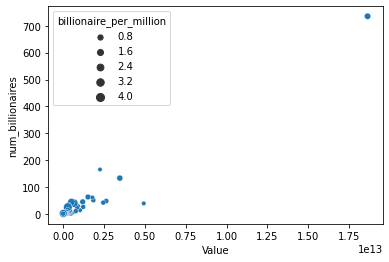

In [35]:
sns.scatterplot(data=gdps_bill_bygdp[1:], x='Value', y='num_billionaires', size='billionaire_per_million')

(-2147483648, 2504702625568.63)